## Bike Sharing System : Multiple linear regression model

## Step 1 : Importing the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
boom_bikes = pd.read_csv('day.csv')

## Step 2 : Understanding the data 

In [3]:
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom_bikes.shape

(730, 16)

The data set contains 730 rows and 16 columns 

In [5]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#To check columns present in dataset
print(boom_bikes.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Step 3 : Data Cleaning 

In [8]:
## Cheking the Null Values 
print(boom_bikes.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### There are no null values in the data set

### Some of the columns which are not necessary can be dropped 
1. Since the 'dteday' has the info on date and year which are already there in the columns can be dropped 
2. Since 'instance' is an index column that can also be dropped 
3. Since our focus is on total count casual and registered columns can be dropped 

In [9]:
boom_bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


### Converting variables with labels into categorical string values

In [11]:
boom_bikes['season']=boom_bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bikes['mnth']=boom_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bikes['weathersit']=boom_bikes.weathersit.map({1: 'Clear+Partly cloudy',2:'Mist + Cloudy',3:'Light Snow+Rain',4:'Heavyrain+thunder'})
boom_bikes['weekday']=boom_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear+Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear+Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear+Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### In the numerical variables there are 2 columns which are related to temperature , let us understand the relationship between 'temp' and 'atemp'

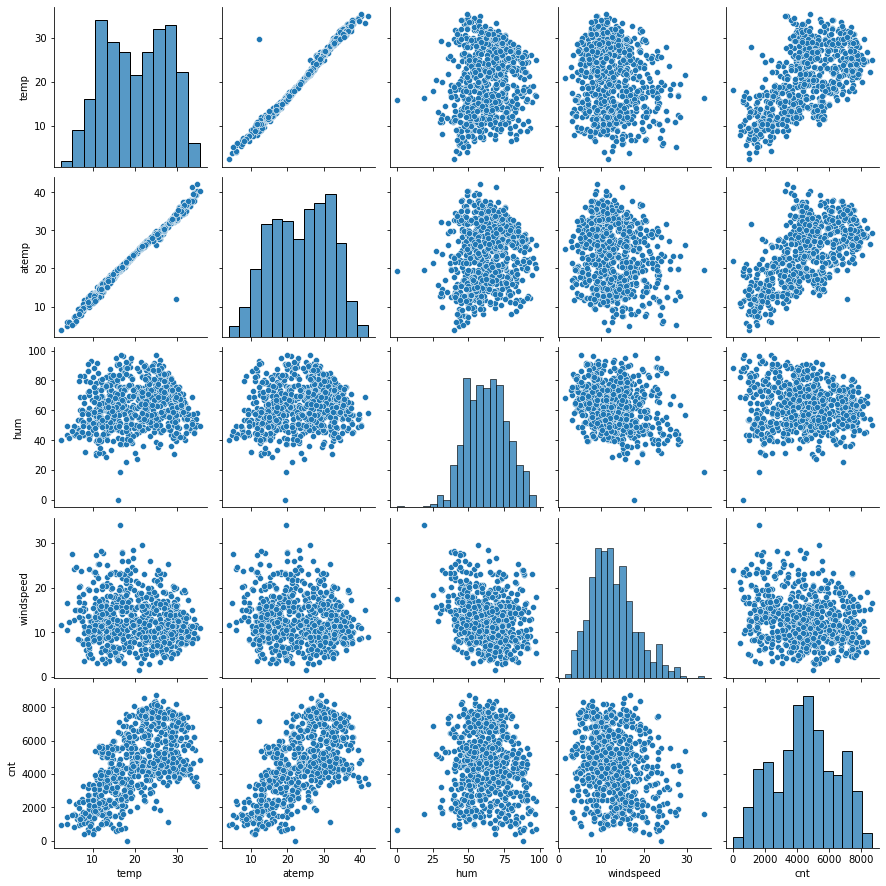

In [13]:
sns.pairplot(boom_bikes, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

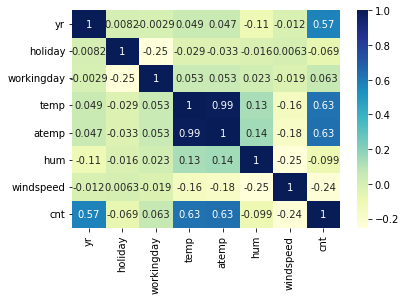

In [14]:
sns.heatmap(boom_bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see that temp and atemp are related to each other , we can drop any one of these columns 

In [15]:
boom_bikes.drop(['temp'],axis=1,inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear+Partly cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear+Partly cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear+Partly cloudy,11.46350,43.6957,12.522300,1600


## Step 4 : EDA

There are 2 types of variables 
1. Categorical - season, yr, mnth, holiday, workingday, weathersit, weekday
2. Numerical - atemp, hum, windspeed, cnt

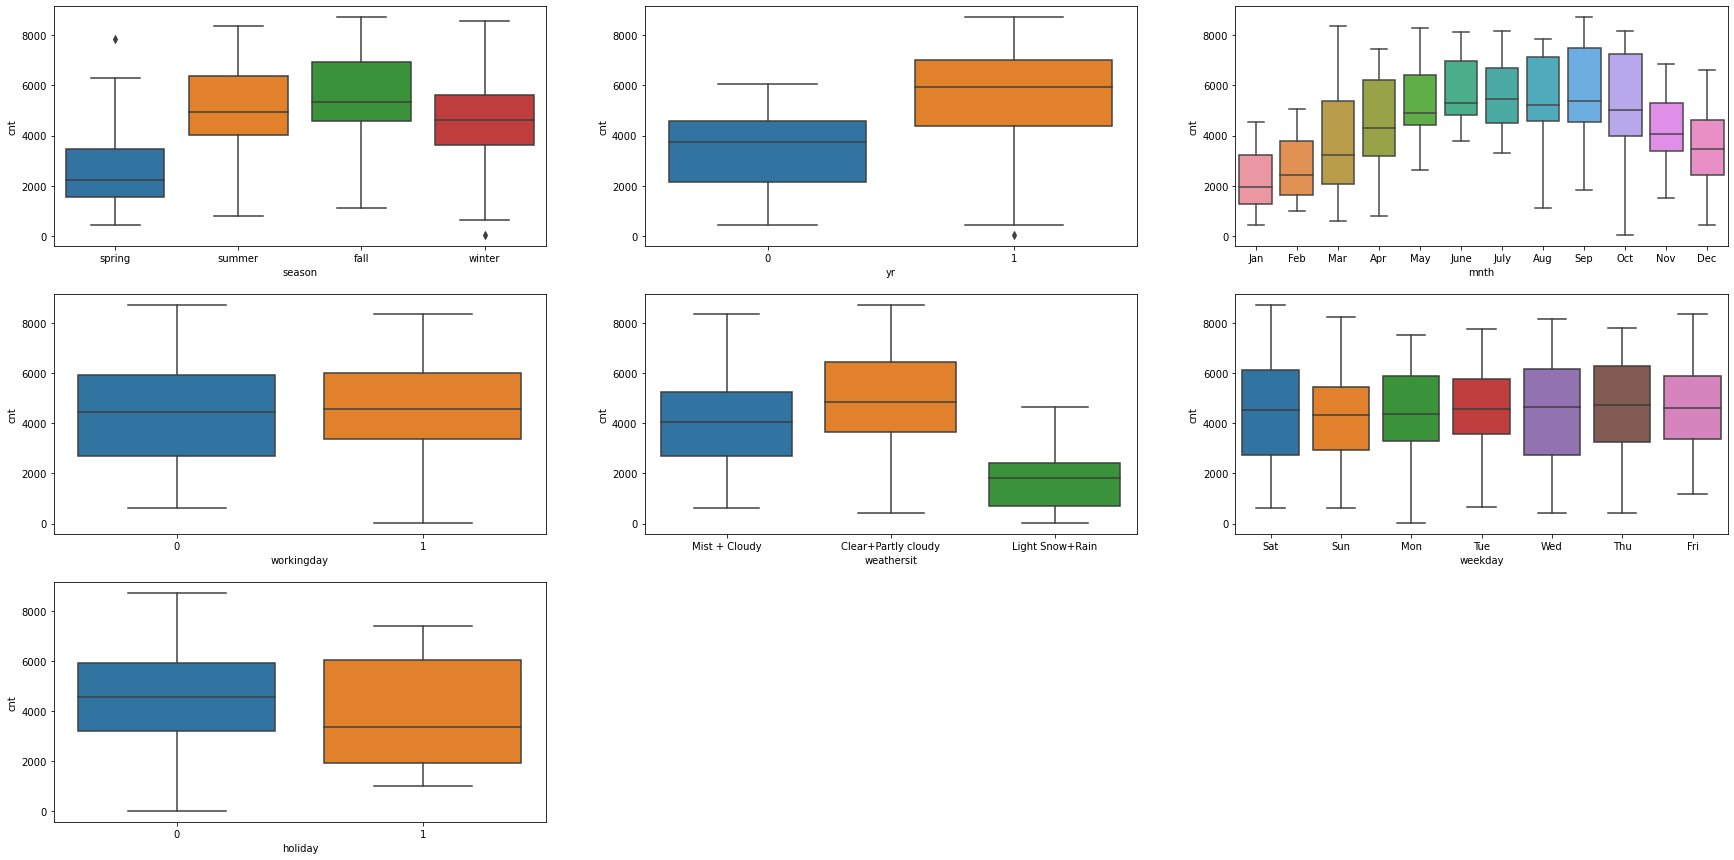

In [16]:
## Visualizing categorical variables -- Univariate analysis 
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bikes)
plt.show()

From the above plots it is infered that 
Bike Rentals are more during 
1. Fall season than spring 
2. In the year 2019 than 2018
3. In the month of sept and october than Jan and Feb
4. Clear + Partly cloudy weather than Light snow and rain 
5. Saturday , wednesday and Thursday

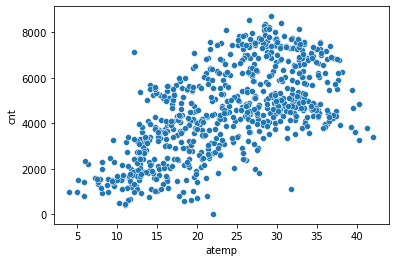

In [17]:
## Visualizing Numerical variables -- Univariate analysis 
sns.scatterplot(x='atemp',y='cnt' ,data = boom_bikes)
plt.show()

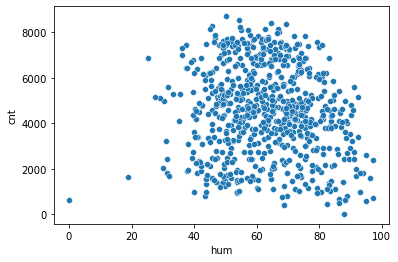

In [18]:
sns.scatterplot(x='hum', y='cnt',data = boom_bikes)
plt.show()

From the above plot it is clear that 
Bike rentals are more 
1. In the temperatuere between 15-30 degree
2. In the humidity range between 40-80

## Step 5 : Data Preparation

#### Creating dummy variables for Categorical Data 

In [19]:
Season_condition=pd.get_dummies(boom_bikes['season'],drop_first=True)
Weather_condition=pd.get_dummies(boom_bikes['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(boom_bikes['weekday'],drop_first=True)
Month=pd.get_dummies(boom_bikes['mnth'],drop_first=True)

In [20]:
# Combining the results to the original bike dataframe

boom_bikes=pd.concat([Season_condition,Weather_condition,Day_of_week,Month,boom_bikes],axis=1)
boom_bikes.head()

,spring,summer,winter,Light Snow+Rain,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,...,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,0,0,1,0,1,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,1,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,1,0,0,0,0,...,0,Jan,0,Mon,1,Clear+Partly cloudy,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,1,...,0,Jan,0,Tue,1,Clear+Partly cloudy,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear+Partly cloudy,11.46350,43.6957,12.522300,1600


In [21]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   spring           730 non-null    uint8  
 1   summer           730 non-null    uint8  
 2   winter           730 non-null    uint8  
 3   Light Snow+Rain  730 non-null    uint8  
 4   Mist + Cloudy    730 non-null    uint8  
 5   Mon              730 non-null    uint8  
 6   Sat              730 non-null    uint8  
 7   Sun              730 non-null    uint8  
 8   Thu              730 non-null    uint8  
 9   Tue              730 non-null    uint8  
 10  Wed              730 non-null    uint8  
 11  Aug              730 non-null    uint8  
 12  Dec              730 non-null    uint8  
 13  Feb              730 non-null    uint8  
 14  Jan              730 non-null    uint8  
 15  July             730 non-null    uint8  
 16  June             730 non-null    uint8  
 17  Mar             

In [22]:
# Drop 'season','month','weekday','weathersit' 

boom_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
boom_bikes.head()

,spring,summer,winter,Light Snow+Rain,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,...,Nov,Oct,Sep,yr,holiday,workingday,atemp,hum,windspeed,cnt
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,11.46350,43.6957,12.522300,1600


#### Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(boom_bikes_train.shape)
print(boom_bikes_test.shape)

(510, 29)
(219, 29)


#### Scaling the nunmerical data - Using MinMax Method 

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
boom_bikes_train[num_vars] = scaler.fit_transform(boom_bikes_train[num_vars])
boom_bikes_train.head()

,spring,summer,winter,Light Snow+Rain,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,...,Nov,Oct,Sep,yr,holiday,workingday,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0.391735,0.504508,0.188475,0.482973


In [26]:
boom_bikes_train.describe()

,spring,summer,winter,Light Snow+Rain,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,...,Nov,Oct,Sep,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,...,0.086275,0.086275,0.080392,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,...,0.281045,0.281045,0.272166,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


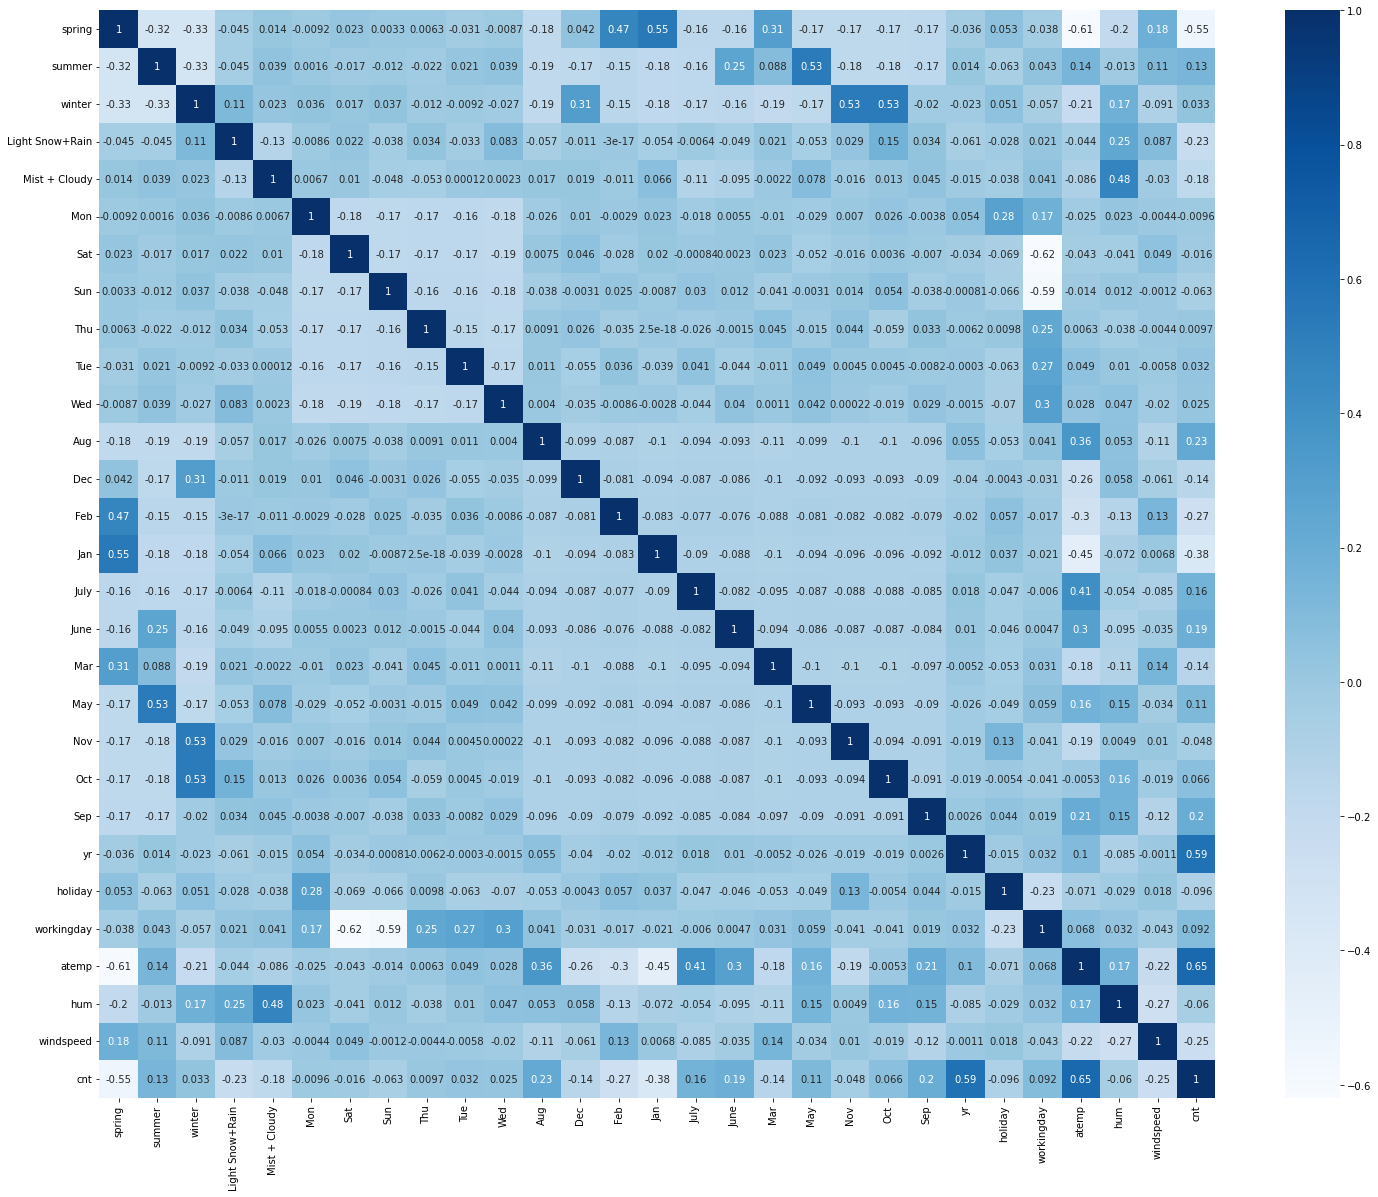

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize=(25, 20))
sns.heatmap(boom_bikes_train.corr(),cmap='Blues',annot = True)
plt.show()

From the heatmap we can see temp and year is  correlated to the 'count' variable. Even in months August and September we can see the counts are little high.

#### Creating  X and Y for Model Building

In [28]:
y_train = boom_bikes_train.pop('cnt')
X_train = boom_bikes_train

In [29]:
X_train.head()

,spring,summer,winter,Light Snow+Rain,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,...,May,Nov,Oct,Sep,yr,holiday,workingday,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0.438975,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.200348,0.498067,0.663106
482,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0.391735,0.504508,0.188475


In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 6: Building a linear Regression model

In [31]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [33]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow+Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 2),
 ('Sun', False, 8),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 11),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 13),
 ('June', False, 6),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [34]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['summer', 'winter', 'Light Snow+Rain', 'Mist + Cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'Nov', 'Sep', 'yr', 'holiday', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [35]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['spring', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'July', 'June',
       'Mar', 'May', 'Oct', 'workingday'],
      dtype='object')

### Building model using statsmodel

In [36]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[col]

In [37]:
X_train_rfe.head()

,summer,winter,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,hum,windspeed
653,0,1,0,0,0,0,0,0,0,0,1,0,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,0,0,0,1,0,0.766351,0.725633,0.264686
426,0,0,0,1,0,0,0,0,0,0,1,0,0.438975,0.640189,0.255342
728,0,0,0,0,0,1,0,0,0,0,1,0,0.200348,0.498067,0.663106
482,1,0,0,1,0,0,0,0,0,0,1,0,0.391735,0.504508,0.188475


In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.26e-186
Time:                        19:42:05   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2936      0.032     

### Calculating VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [41]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,25.11
12,atemp,14.42
14,windspeed,3.89
1,winter,3.04
0,summer,2.28
3,Mist + Cloudy,2.24
10,yr,2.06
7,Jan,1.92
8,Nov,1.85
5,Dec,1.63


### Model 1

Column 'hum' has very high VIF Value hence we will drop this column 

In [43]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [44]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [45]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [46]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.00e-184
Time:                        19:42:22   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2114      0.026     

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,atemp,4.99
13,windspeed,3.83
1,winter,2.62
10,yr,2.06
0,summer,2.04
8,Nov,1.81
4,Aug,1.59
3,Mist + Cloudy,1.57
5,Dec,1.41
9,Sep,1.35


### Model 2

Column 'Windspeed' has very high VIF Value hence we will drop this column, even though ''atemp'' has higher VIF value than windspeed 'atemp' has a highest corelation with count in pair plot and hence let us keep that.

In [49]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [50]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.75e-178
Time:                        19:44:34   Log-Likelihood:                 482.49
No. Observations:                 510   AIC:                            -937.0
Df Residuals:                     496   BIC:                            -877.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1351      0.023     

In [51]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,atemp,3.98
1,winter,2.60
10,yr,2.04
0,summer,1.91
8,Nov,1.77
4,Aug,1.59
3,Mist + Cloudy,1.56
5,Dec,1.37
9,Sep,1.35
7,Jan,1.15


### Model 3

Column 'Winter' has very high VIF Value hence we will drop this column

In [53]:
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

KeyError: "['winter'] not found in axis"

In [ ]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Model 4

Adding working day to check if the model improves 

In [54]:
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,workingday
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,1
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,1
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0


In [55]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.83e-161
Time:                        19:45:14   Log-Likelihood:                 443.21
No. Observations:                 510   AIC:                            -858.4
Df Residuals:                     496   BIC:                            -799.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1987      0.024     

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,4.72
12,workingday,3.10
9,yr,2.04
0,summer,1.79
2,Mist + Cloudy,1.54
3,Aug,1.50
8,Sep,1.35
6,Jan,1.21
7,Nov,1.21
4,Dec,1.16


Column 'Working day' has very high VIF Value hence we will drop this column

In [57]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.03e-162
Time:                        19:45:22   Log-Likelihood:                 441.71
No. Observations:                 510   AIC:                            -857.4
Df Residuals:                     497   BIC:                            -802.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2085      0.023     

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.66
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.52
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
6,Jan,1.14
4,Dec,1.13
5,Feb,1.09


### Model 5

Adding ''Sunday'' to check if the model improves

In [59]:
X_train_rfe['Sun']=X_train['Sun']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0


In [60]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:45:35   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


Adding Sunday improved the Model , we can keep it 

### Model 6

Adding ''Monday'' to check if the model improves

In [62]:
X_train_rfe['Mon']=X_train['Mon']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Mon
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [63]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     141.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.79e-162
Time:                        19:45:52   Log-Likelihood:                 448.24
No. Observations:                 510   AIC:                            -866.5
Df Residuals:                     495   BIC:                            -803.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2190      0.023     

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.89
9,yr,2.04
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
13,Mon,1.31
12,Sun,1.20
7,Nov,1.18
6,Jan,1.15


Column 'Mon' has increased  VIF Value hence we will drop this column

In [65]:
X_train_rfe=X_train_rfe.drop(['Mon'],axis=1)
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:45:55   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 7

Adding ''Tuesday'' to check if the model improves

In [67]:
X_train_rfe['Tue']=X_train['Tue']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Tue
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,1
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,1
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [68]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.98e-162
Time:                        19:46:16   Log-Likelihood:                 448.13
No. Observations:                 510   AIC:                            -866.3
Df Residuals:                     495   BIC:                            -802.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2184      0.023     

In [69]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.98
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
12,Sun,1.20
7,Nov,1.19
13,Tue,1.19
6,Jan,1.15


Column 'Tue' has increased VIF Value hence we will drop this column

In [70]:
X_train_rfe=X_train_rfe.drop(['Tue'],axis=1)
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:46:19   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [71]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 8

Adding ''Wednesday'' to check if the model improves

In [72]:
X_train_rfe['Wed']=X_train['Wed']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Wed
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [73]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.39e-162
Time:                        19:46:34   Log-Likelihood:                 447.93
No. Observations:                 510   AIC:                            -865.9
Df Residuals:                     495   BIC:                            -802.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2165      0.023     

In [74]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.93
9,yr,2.03
0,summer,1.77
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.35
13,Wed,1.24
12,Sun,1.21
7,Nov,1.19
6,Jan,1.16


Column 'Wed' has increased VIF Value hence we will drop this column

In [75]:
X_train_rfe=X_train_rfe.drop(['Wed'],axis=1)
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:46:37   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [76]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 9

Adding ''Thursday'' to check if the model improves

In [77]:
X_train_rfe['Thu']=X_train['Thu']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Thu
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [78]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.25e-162
Time:                        19:46:50   Log-Likelihood:                 448.00
No. Observations:                 510   AIC:                            -866.0
Df Residuals:                     495   BIC:                            -802.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2181      0.023     

In [79]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.92
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.35
12,Sun,1.20
7,Nov,1.19
13,Thu,1.19
6,Jan,1.16


Column 'Thu' has increased VIF Value hence we will drop this column

In [80]:
X_train_rfe=X_train_rfe.drop(['Thu'],axis=1)
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:46:54   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [81]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 10

Adding ''Saturday'' to check if the model improves

In [82]:
X_train_rfe['Sat']=X_train['Sat']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Sat
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,1
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,1


In [83]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.20e-162
Time:                        19:47:05   Log-Likelihood:                 448.02
No. Observations:                 510   AIC:                            -866.0
Df Residuals:                     495   BIC:                            -802.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2151      0.023     

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.93
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
13,Sat,1.21
12,Sun,1.20
7,Nov,1.19
6,Jan,1.16


Column 'Thu' has increased VIF Value hence we will drop this column

In [85]:
X_train_rfe=X_train_rfe.drop(['Sat'],axis=1)
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:47:11   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [86]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 11

Adding ''March'' to check if the model improves

In [87]:
X_train_rfe['Mar']=X_train['Mar']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Mar
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,1
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [88]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.55e-167
Time:                        19:47:30   Log-Likelihood:                 460.31
No. Observations:                 510   AIC:                            -890.6
Df Residuals:                     495   BIC:                            -827.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2952      0.027     

In [89]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.84
9,yr,2.05
0,summer,1.76
2,Mist + Cloudy,1.54
3,Aug,1.52
8,Sep,1.36
7,Nov,1.19
12,Sun,1.17
6,Jan,1.15
4,Dec,1.14


Column 'Mar' has increased VIF Value hence we will drop this column

In [90]:
X_train_rfe=X_train_rfe.drop(['Mar'],axis=1)
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:47:33   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 12

Adding ''May'' to check if the model improves

In [92]:
X_train_rfe['May']=X_train['May']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,May
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,0
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [93]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.97e-163
Time:                        19:47:47   Log-Likelihood:                 448.95
No. Observations:                 510   AIC:                            -867.9
Df Residuals:                     495   BIC:                            -804.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2222      0.023     

In [94]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.84
0,summer,2.20
9,yr,2.04
13,May,1.55
2,Mist + Cloudy,1.53
3,Aug,1.51
8,Sep,1.35
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14


Column 'May' has increased VIF Value hence we will drop this column

In [95]:
X_train_rfe=X_train_rfe.drop(['May'],axis=1)
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:47:51   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [96]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 13

Adding ''October'' to check if the model improves

In [97]:
X_train_rfe['Oct']=X_train['Oct']
X_train_rfe.head()

,summer,Light Snow+Rain,Mist + Cloudy,Aug,Dec,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun,Oct
653,0,0,0,0,0,0,0,0,0,1,0,0.501133,0,1
576,0,0,0,0,0,0,0,0,0,1,0,0.766351,0,0
426,0,0,1,0,0,0,0,0,0,1,0,0.438975,0,0
728,0,0,0,0,1,0,0,0,0,1,0,0.200348,1,0
482,1,0,1,0,0,0,0,0,0,1,0,0.391735,0,0


In [98]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     159.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.68e-173
Time:                        19:48:05   Log-Likelihood:                 473.28
No. Observations:                 510   AIC:                            -916.6
Df Residuals:                     495   BIC:                            -853.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1425      0.024     

In [99]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,4.27
9,yr,2.04
0,summer,1.98
3,Aug,1.63
2,Mist + Cloudy,1.57
8,Sep,1.45
13,Oct,1.35
7,Nov,1.23
12,Sun,1.18
4,Dec,1.17


Column 'Oct' has increased VIF Value hence we will drop this column

In [100]:
X_train_rfe=X_train_rfe.drop(['Oct'],axis=1)
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-163
Time:                        19:48:14   Log-Likelihood:                 447.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.023     

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,3.81
9,yr,2.03
0,summer,1.76
2,Mist + Cloudy,1.53
3,Aug,1.50
8,Sep,1.34
7,Nov,1.18
12,Sun,1.17
6,Jan,1.14
4,Dec,1.13


### Model 14

Column 'Dec' has very high 'p' value , let us drop that column 

In [102]:
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.97e-164
Time:                        19:50:38   Log-Likelihood:                 447.62
No. Observations:                 510   AIC:                            -869.2
Df Residuals:                     497   BIC:                            -814.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2083      0.019     

In [103]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,atemp,3.73
8,yr,2.01
0,summer,1.69
2,Mist + Cloudy,1.49
3,Aug,1.46
7,Sep,1.31
11,Sun,1.17
6,Nov,1.16
5,Jan,1.13
4,Feb,1.09


### Model 15

Column 'Aug' has very high 'p' value , let us drop that column

In [104]:
X_train_rfe=X_train_rfe.drop(['Aug'],axis=1)
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.27e-165
Time:                        19:51:42   Log-Likelihood:                 446.77
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     498   BIC:                            -818.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2053      0.019     

In [105]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,2.89
7,yr,2.01
0,summer,1.48
2,Mist + Cloudy,1.48
6,Sep,1.22
10,Sun,1.16
5,Nov,1.13
4,Jan,1.12
3,Feb,1.08
8,holiday,1.06


#### We have considered all columns and checked for VIF values .Now we stop the model building and pick up the last model which has best values among all and do residual analysis 

## Step 7 : Validating the Assumptions

#### Residual Analysis 

In [107]:
#Predict values
y_train_cnt = lm23.predict(X_train_rfe23)

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

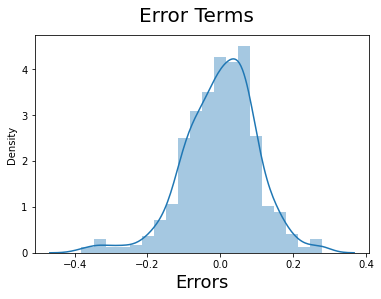

In [110]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### Check for Homoscedasticity

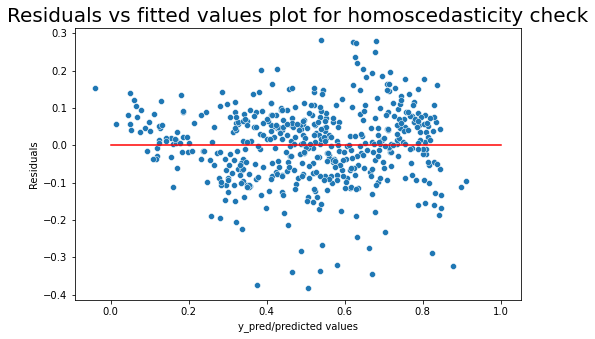

In [112]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_cnt,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

## Step 8 : Making Prediction using Final Model

In [113]:
#Checking columns
X_train_rfe23.columns

Index(['const', 'summer', 'Light Snow+Rain', 'Mist + Cloudy', 'Feb', 'Jan',
       'Nov', 'Sep', 'yr', 'holiday', 'atemp', 'Sun'],
      dtype='object')

In [114]:
print(X_train_rfe23.shape)
print(res.shape)

(510, 12)
(510,)


In [115]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
boom_bikes_test[num_vars] = scaler.fit_transform(boom_bikes_test[num_vars])

In [116]:
#Creating x and y sets

y_test = boom_bikes_test.pop('cnt')
X_test = boom_bikes_test

In [117]:
X_train_new=X_train_rfe23.drop(['const'], axis=1)

In [118]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [119]:
X_train_rfe23.columns

Index(['const', 'summer', 'Light Snow+Rain', 'Mist + Cloudy', 'Feb', 'Jan',
       'Nov', 'Sep', 'yr', 'holiday', 'atemp', 'Sun'],
      dtype='object')

## Step 9 : MODEL EVALUATION

In [120]:
#Making predictions on the chosen model

y_pred = lm23.predict(X_test_new)

Text(0, 0.5, 'y_pred')

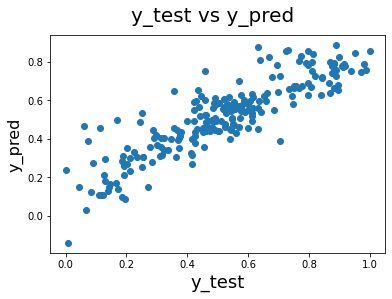

In [121]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [123]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11579975547400836

In [124]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7635759019055395

In [125]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7287344558705664

In [126]:
X_t=X_train_new.iloc[:,0].values

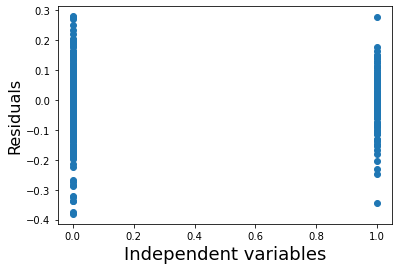

In [127]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [128]:
X_train_new.head()

,summer,Light Snow+Rain,Mist + Cloudy,Feb,Jan,Nov,Sep,yr,holiday,atemp,Sun
653,0,0,0,0,0,0,0,1,0,0.501133,0
576,0,0,0,0,0,0,0,1,0,0.766351,0
426,0,0,1,0,0,0,0,1,0,0.438975,0
728,0,0,0,0,0,0,0,1,0,0.200348,1
482,1,0,1,0,0,0,0,1,0,0.391735,0


In [131]:
print(X_train_rfe23.columns)
print(lm23.summary())

Index(['const', 'summer', 'Light Snow+Rain', 'Mist + Cloudy', 'Feb', 'Jan',
       'Nov', 'Sep', 'yr', 'holiday', 'atemp', 'Sun'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.27e-165
Time:                        20:05:01   Log-Likelihood:                 446.77
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     498   BIC:                            -818.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|

#### FINAL RESULT COMPARISON:

Train data r^2 : 79.8

Train data adjusted r^2 : 79.4

Test data r^2 : 76.3

Test data adjusted r^2 : 72.9

This seems to be a really good model that can very well 'Generalize' various datasets.

### The equation for best fitted line is as below

cnt =  [ 0.0204Xsummer - 0.2822XLightSnow+Rain - 0.0752XMist+Cloudy - 0.1090XFeb - 0.1299XJan + 0.0375XNov + 0.0920XSep + 0.2359Xyr - 0.0992Xholiday +0.0458Xatemp - 0.0458XSat ]  

#### The demand for the bikes depends on the following fatcors 
Year, Holiday, Summer, Saturday, months of February, January, November, September, Lightsnow+Rain, Mist+Cloudy, atemp

#### The demand increses  in 
Summer, November, September, Year 2019 and atemp 

#### The demand decreses in
Holiday, Sunday, February, January, Lightsnow+Rain, Mist+Cloudy

## Final Redomendations from the Linear Regression Model to the Company is ; demand is high in Summer season, high temp and the months of November and September 